# Car Price Prediction
Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

In this notebook, First i have done some exploration on the data using matplotlib and seaborn. Then, I used different Regrssion algorithms using sklearn pipeline for implementation.
Then I used cross validation evaluation technique to optimize the model performance.

In [148]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os

#importing Scikit-learn packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns = 500

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'CarPrice_Assignment.csv',
 'Data Dictionary - carprices.xlsx',
 'src.ipynb']

## Reading and Understanding the Data

In [57]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [31]:
df.shape

(205, 26)

In [32]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
for col in df.select_dtypes(include='object').columns:
    print("Number of unique values in {} are {}".format(col, df[col].nunique()))

Number of unique values in CarName are 147
Number of unique values in fueltype are 2
Number of unique values in aspiration are 2
Number of unique values in doornumber are 2
Number of unique values in carbody are 5
Number of unique values in drivewheel are 3
Number of unique values in enginelocation are 2
Number of unique values in enginetype are 7
Number of unique values in cylindernumber are 7
Number of unique values in fuelsystem are 8


## Feature Engineering

Using the CarName, a new feature **Brand** is created

In [58]:
df['Brand'] = df['CarName'].apply(lambda x: x.split(" ")[0])

In [149]:
#Fixing Spelling Mistakes
df['Brand'] = df['Brand'].str.replace("toyouta","toyota")
df['Brand'] = df['Brand'].str.replace("vw","volkswagen")
df['Brand'] = df['Brand'].str.replace("vokswagen","volkswagen")

## Exploratory Data Analysis

1. Checking for distribution of numeric features

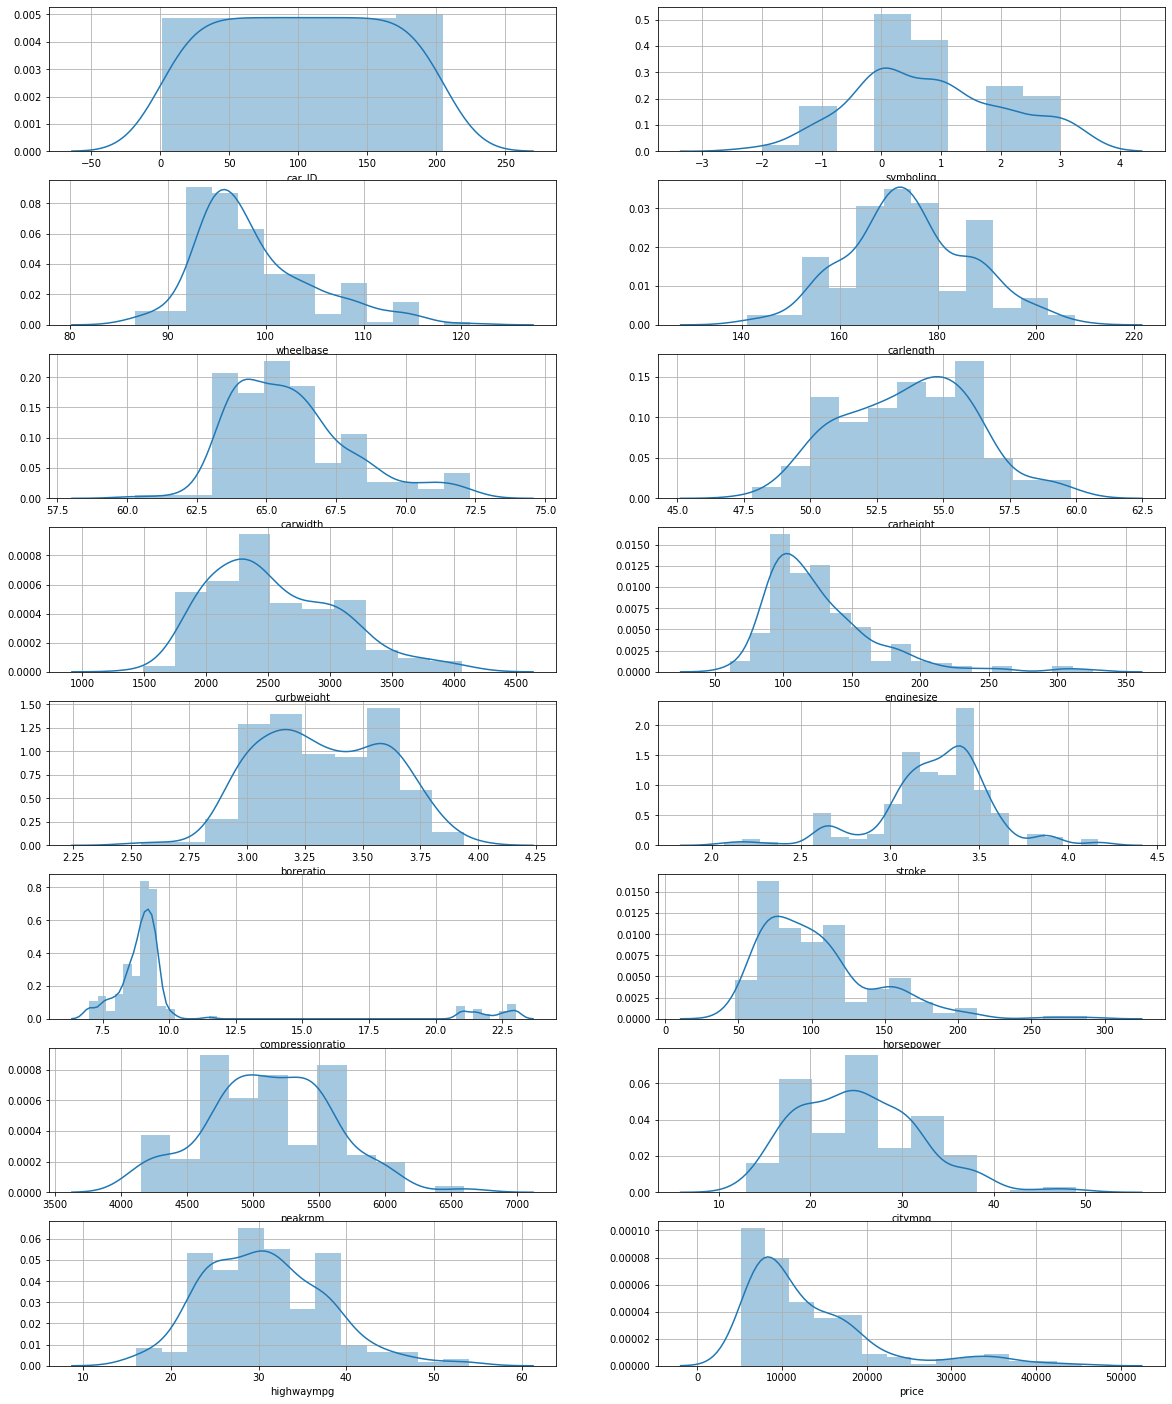

In [46]:
plt.figure(figsize=(20,25))
for i, column in enumerate(list(df.select_dtypes(include=['float64','int64']))):
    plt.subplot(8, 2, i+1)
    sns.distplot(df[column])
    plt.grid()

Inference : Target Variable is positively skewed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

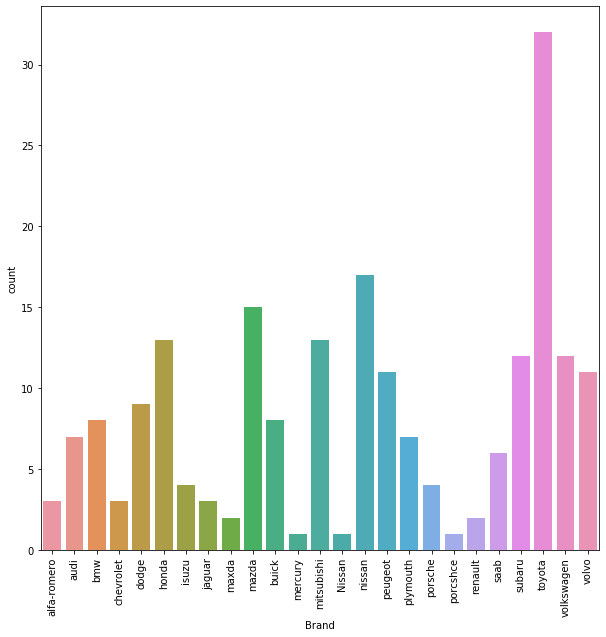

In [134]:
plt.figure(figsize=(10,10))
sns.countplot(df["Brand"])
plt.xticks(rotation=90)

Inference : Maximum Cars in the dataset are fro Toyato Brand

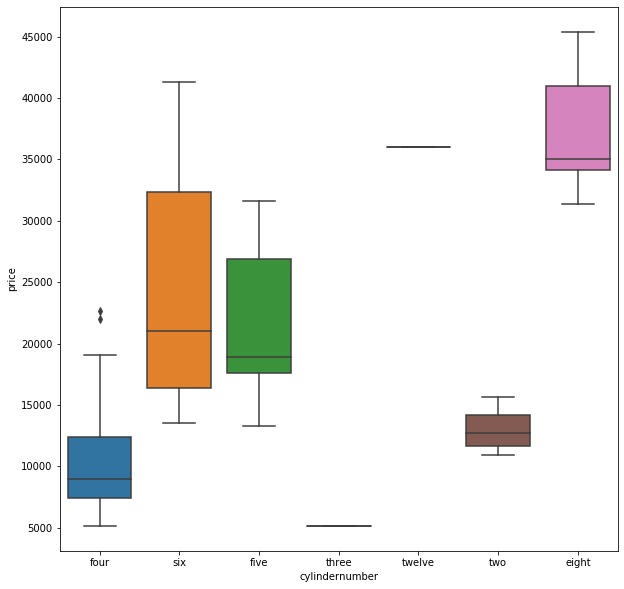

In [130]:
plt.figure(figsize=(10,10))
sns.boxplot(x = df["cylindernumber"], y = df["price"])

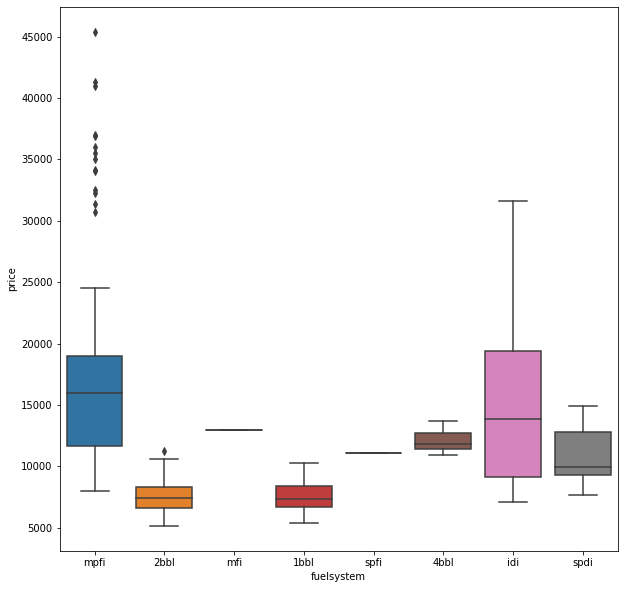

In [131]:
plt.figure(figsize=(10,10))
sns.boxplot(x = df["fuelsystem"], y = df["price"])

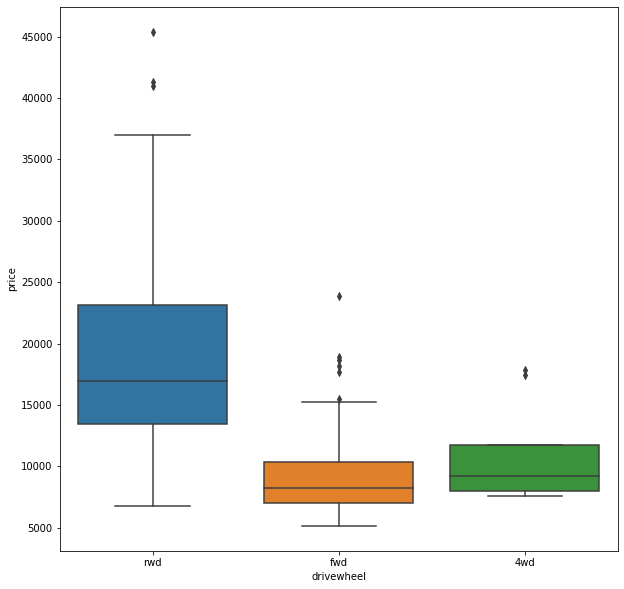

In [132]:
plt.figure(figsize=(10,10))
sns.boxplot(x = df["drivewheel"], y = df["price"])

Inference : Cars having drive wheel **rwd** have higher average price

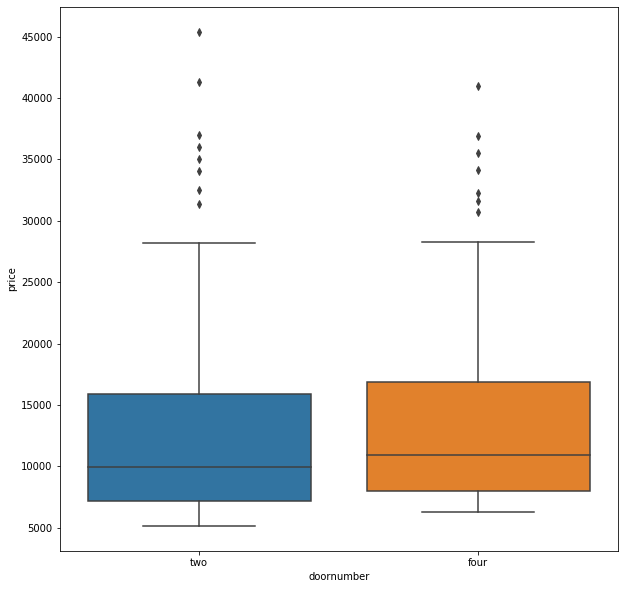

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(x = df["doornumber"], y = df["price"])

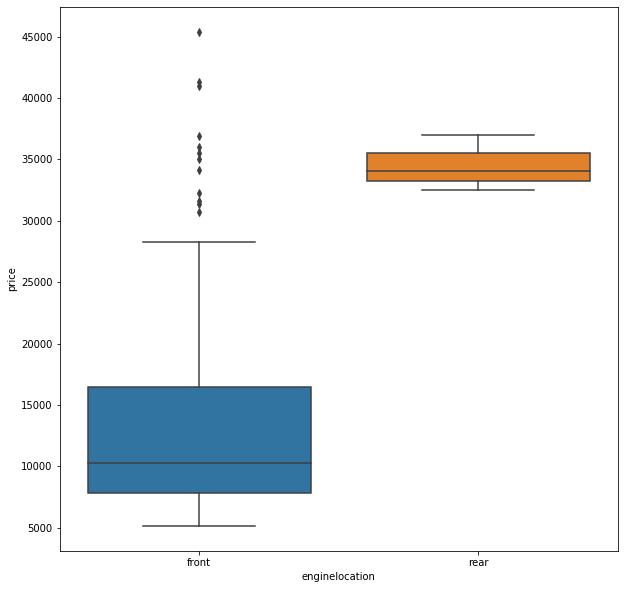

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(x = df["enginelocation"], y = df["price"])

## Correlation Matrix

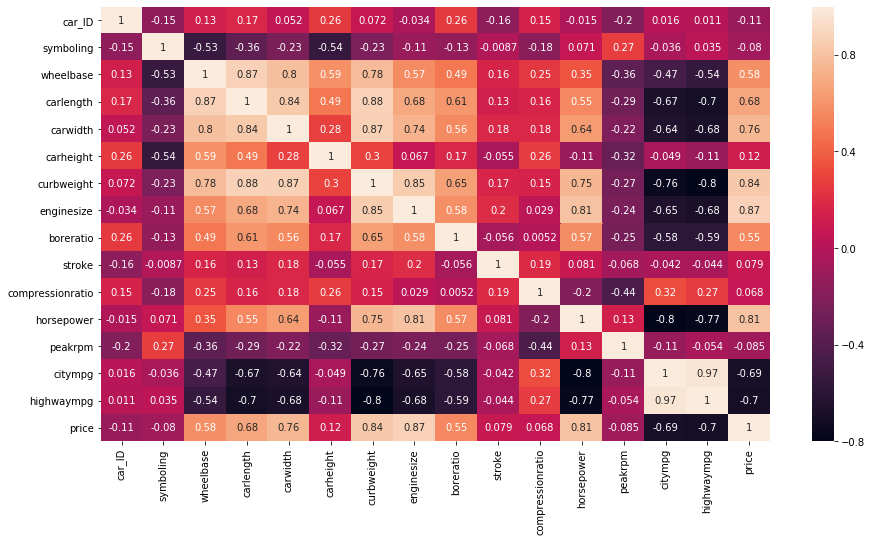

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

Highly correlated variables to price are - curbweight, enginesize, horsepower, carwidth.
Dropping unnecessary features which are very less correlated to price.

In [ ]:
df.drop(columns=["stroke", "peakrpm", "symboling", "compressionratio"], inplace = True)

In [61]:
df.drop(columns=["car_ID", "CarName", "enginelocation"], inplace=True)

# Training

In [70]:
X = df.drop(columns=["price"],axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((164, 19), (41, 19), (164,), (41,))

In [71]:
#Categorical Features
cat_features = list(df.select_dtypes(include="object").columns)
cat_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'Brand']

In [199]:
#Custom get_dummies Class for pipeline
class get_dummies_PipeLineFriendly(BaseEstimator, TransformerMixin):
    
    def __init__(self,freq_cutoff=0):
        self.freq_cutoff=freq_cutoff
        self.var_cat_dict={}
        
    def fit(self,x,y=None):
        data_cols=x.columns
        for col in data_cols:
            k=x[col].value_counts()
            cats=k.index[k>self.freq_cutoff][:-1]
            self.var_cat_dict[col]=cats
        return self
            
    def transform(self,x,y=None):
        dummy_data=x.copy()
        for col in self.var_cat_dict.keys():
            for cat in self.var_cat_dict[col]:
                name=col+'_'+cat
                dummy_data[name]=(dummy_data[col]==cat).astype(int)
            del dummy_data[col]
        return dummy_data

### ColumnTransformer
Applies transformers to columns of an array or pandas DataFrame. This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

In [73]:
#Defining ColumnTransformer
columnTransformer = ColumnTransformer([('dummies',get_dummies_PipeLineFriendly(5),cat_features)],
                                      remainder='passthrough',verbose=True)

## Making Pipeline

In [96]:
#Applying different Regression algorithmns
classifiers = [
    LinearRegression(),
    Lasso(fit_intercept=True),
    Ridge(fit_intercept=True),
    SVR(),
    RandomForestRegressor()
    ]

#Iterator 
for i,classifier in enumerate(classifiers):
    
    print("Initializing Pipeline",end="\n\n")
    #Defining Pipeline
    pipe = Pipeline(steps=[('preprocessor', columnTransformer),('classifier', classifier)],verbose=True)
    pipe.fit(X_train, y_train)
    print("\n")
    #Printing current classifier
    print("{}.{}".format(i+1, classifier),end="\n\n")
    #Printing score
    predicted_values = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, predicted_values)
    print('MEAN ABSOLUTE ERROR is {}'.format(mae))
    if(i==4):
        break
    print("-----------------------------------------------------------------------",end="\n\n")

Initializing Pipeline

[ColumnTransformer] ....... (1 of 2) Processing dummies, total=   0.1s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


1.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MEAN ABSOLUTE ERROR is 2056.9105609756098
-----------------------------------------------------------------------

Initializing Pipeline

[ColumnTransformer] ....... (1 of 2) Processing dummies, total=   0.1s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


2.Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, war

## Fine Tuning using GridSearchCV

In [84]:
#Generating Random Parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 3)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap}
random_grid

{'classifier__n_estimators': [400, 550, 700, 850, 1000],
 'classifier__max_features': ['auto', 'sqrt'],
 'classifier__max_depth': [10, 35, 60, None],
 'classifier__min_samples_split': [2, 5, 10],
 'classifier__min_samples_leaf': [1, 2, 4],
 'classifier__bootstrap': [True, False]}

In [97]:
pipe = Pipeline(steps=[('preprocessor', columnTransformer),('classifier', RandomForestRegressor())],verbose=True)

rg = RandomizedSearchCV(estimator=pipe,
                  param_distributions = random_grid,
                  cv = 5,
                  n_jobs=-1,
                  n_iter = 100,
                  random_state=42,
                  verbose=2, 
                  scoring='neg_mean_absolute_error',
                  error_score='raise-deprecating')

rg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished


[ColumnTransformer] ....... (1 of 2) Processing dummies, total=   0.1s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.2s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('dummies',
                                                                               get_dummies_PipeLineFriendly(freq_cutoff=5),
                                                                               ['fueltype',
                                                                                'aspiration',
                                                                                'doornu

In [137]:
rg.best_params_

{'classifier__n_estimators': 850,
 'classifier__min_samples_split': 2,
 'classifier__min_samples_leaf': 1,
 'classifier__max_features': 'sqrt',
 'classifier__max_depth': 10,
 'classifier__bootstrap': False}

# Finalize Model

In [146]:
classifier = RandomForestRegressor(
                n_estimators=1000,
                min_samples_split=10,
                max_features='sqrt',
                min_samples_leaf=1,
                max_depth=10,
                bootstrap=False)
pipe = Pipeline(steps=[('preprocessor', columnTransformer),('classifier', RandomForestRegressor())],verbose=True)
pipe.fit(X_train, y_train)

[ColumnTransformer] ....... (1 of 2) Processing dummies, total=   0.1s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('dummies',
                                                  get_dummies_PipeLineFriendly(freq_cutoff=5),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel', 'enginetype',
                                                   'cylindernumber',
                                                   'fuelsystem', 'Brand'])],
                                   verbose=True)),
                ('classifier',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_feature

In [147]:
mean_absolute_error(y_test, pipe.predict(X_test))

1239.8800731707315